In [75]:
import pandas as pd
import numpy as np
import rasterio
import geopandas as gpd
import earthpy.plot as ep
import os
import imageio
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from imblearn.over_sampling import SMOTE
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
import cv2

In [8]:
with rasterio.open("train_data/images/plume/20230101_methane_mixing_ratio_id_4928.tif") as src:
    img = src.read(1)
    
img_meta =src.meta
img_meta
src.res

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


(1.0, 1.0)

In [7]:
meta_df = pd.read_csv('train_data/metadata.csv')

In [25]:
meta_df[['lat','lon']].value_counts()

lat        lon       
29.631951   35.952379    21
32.713854   44.609398    19
33.990812   39.641866    18
28.510000   77.442400    17
36.596520   38.321405    15
                         ..
21.039986  -77.824694     1
24.907500   67.023000     1
23.763333   86.396667     1
23.740000   90.595000     1
68.570113   25.563059     1
Length: 101, dtype: int64

In [26]:
meta_df.head()

,date,id_coord,plume,set,lat,lon,coord_x,coord_y,path
0,20230223,id_6675,yes,train,31.528750,74.330625,24,47,images/plume/20230223_methane_mixing_ratio_id_...
1,20230103,id_2542,yes,train,35.538000,112.524000,42,37,images/plume/20230103_methane_mixing_ratio_id_...
2,20230301,id_6546,yes,train,21.060000,84.936667,58,15,images/plume/20230301_methane_mixing_ratio_id_...
3,20230225,id_6084,yes,train,26.756667,80.973333,28,62,images/plume/20230225_methane_mixing_ratio_id_...
4,20230105,id_2012,yes,train,34.800000,40.770000,59,44,images/plume/20230105_methane_mixing_ratio_id_...


In [60]:
meta_df['path'] = meta_df['path'].astype(str) + '.tif'

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


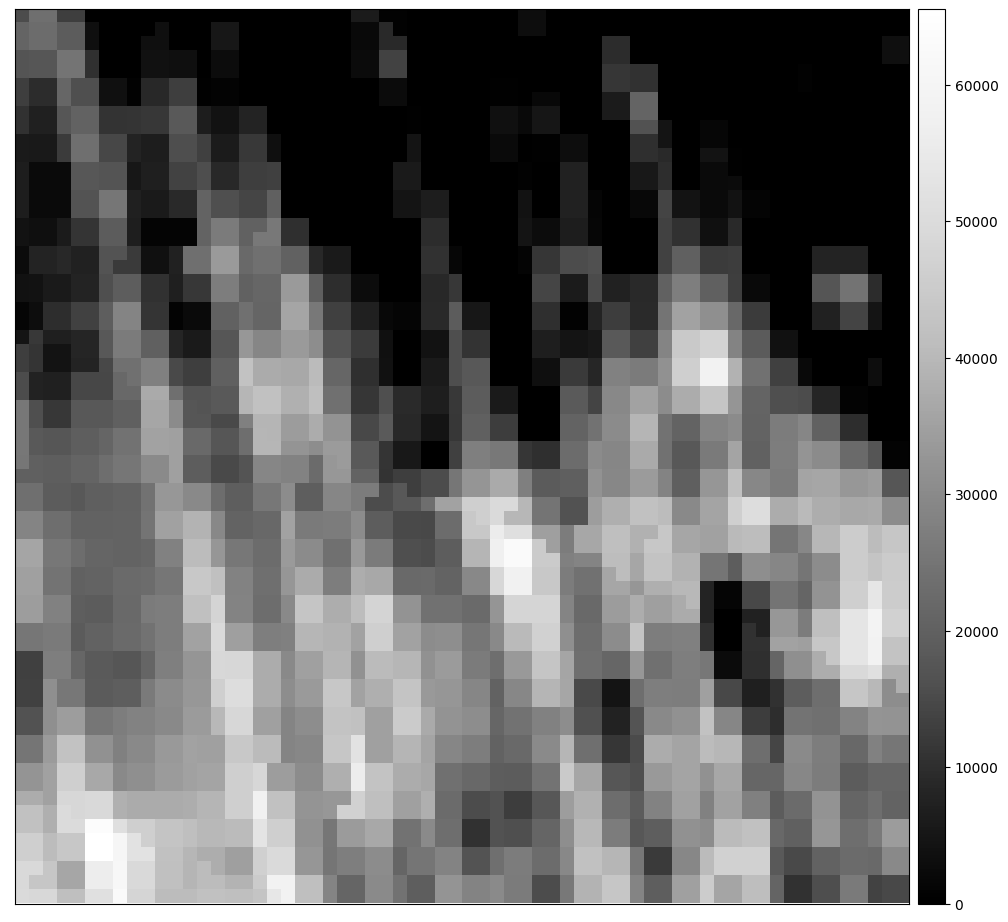

<AxesSubplot: >

In [62]:
with rasterio.open('images/plume/20230223_methane_mixing_ratio_id_6675.tif') as src:
    img = src.read(1)
ep.plot_bands(img)

In [63]:
import pandas as pd
import numpy as np
import rasterio


image_data = []
plume_labels = []

# Loop through the metadata and load images
for index, row in meta_df.iterrows():
    image_path = row['path']
    plume_label = row['plume']

    # Read the TIFF image using rasterio
    try:
        with rasterio.open(image_path) as src:
            image = src.read(1)  # Assuming single-band image, adjust if necessary
            # You may want to resize or preprocess the image here if necessary

        # Append the image data and plume label to their respective lists
        image_data.append(image)
        plume_labels.append(plume_label)
    except Exception as e:
        print(f"Error loading image at {image_path}: {e}")

# Convert the lists into NumPy arrays
image_data = np.array(image_data)
plume_labels = np.array(plume_labels)

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\rasterio\__init__.py:320: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [110]:
image_data

array([[[15373, 23745, 23745, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,     0,     0],
        [21083, 22849, 22849, ...,     0,  3348,  3348],
        ...,
        [49287, 49287, 43637, ..., 22215, 29933, 29933],
        [49287, 43637, 43637, ..., 13711, 14626, 14626],
        [49834, 48903, 48903, ..., 13711, 14626, 14626]],

       [[    0,     0,     0, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        [ 6386, 11516,  1537, ...,     0,     0,     0],
        ...,
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 3878,  6976,  6548, ...,     0,     0,     0],
        [ 4225,     0,  4100, ...,     0,     0,     0]],

       [[14118,  9487,  9487, ..., 25601, 22138, 22138],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        [16914,  5666,  5666, ..., 30095, 26363, 26363],
        ...,
        [14918, 14918, 16676, ..., 18546,     0,     0],
        [14918, 14918, 16676, ..., 18546,    

In [77]:
min_val = image_data.min()
max_val = image_data.max()

# Normalize the image data
normalized_image_data = (image_data - min_val) / (max_val - min_val)
normalized_image_data

array([[[0.23457694, 0.36232547, 0.36232547, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.        , 0.        ],
        [0.32170596, 0.34865339, 0.34865339, ..., 0.        ,
         0.05108721, 0.05108721],
        ...,
        [0.75207141, 0.75207141, 0.66585794, ..., 0.33897917,
         0.4567483 , 0.4567483 ],
        [0.75207141, 0.66585794, 0.66585794, ..., 0.20921645,
         0.22317845, 0.22317845],
        [0.7604181 , 0.74621195, 0.74621195, ..., 0.20921645,
         0.22317845, 0.22317845]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        [0.09744411, 0.1757229 , 0.02345312, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.05917449, 0.10644694, 0.09991608, ..., 0.        ,
         0.        , 0.        ],
        [0.0

In [105]:
X = normalized_image_data
y = plume_labels


#X = [np.transpose(image, (1, 2, 0)) for image in X]

#X = np.array(X)
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (344, 64, 64)
X_test shape: (86, 64, 64)


In [106]:
y_train

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [116]:
tf.random.set_seed(1234)
model = keras.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    # Fully connected layers
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(1,'sigmoid') 
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


model.summary()

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10,           
    restore_best_weights=True  )


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 batch_normalization_30 (Ba  (None, 62, 62, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 31, 31, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 batch_normalization_31 (Ba  (None, 29, 29, 64)        256       
 tchNormalization)                                               
                                                      

In [114]:
batch_size = 32
epochs = 100
model.fit(X_train,y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1,callbacks=[early_stopping])

# Make predictions on the test dataset
predictions = model.predict(X_test)
predictions

Epoch 1/100


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - ETA: 0s - loss: 5.6325e-08 - accuracy: 0.4757

c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(21, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 3s 254ms/step - loss: 5.6325e-08 - accuracy: 0.4757 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 2/100


c:\Users\Rehan Ibrahim\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(3, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 2s 248ms/step - loss: 5.6325e-08 - accuracy: 0.4563 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 3/100
10/10 [==============================] - 3s 261ms/step - loss: 5.6325e-08 - accuracy: 0.4628 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 4/100
10/10 [==============================] - 3s 258ms/step - loss: 5.6325e-08 - accuracy: 0.3981 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 5/100
10/10 [==============================] - 3s 249ms/step - loss: 5.6325e-08 - accuracy: 0.5113 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 6/100
10/10 [==============================] - 3s 252ms/step - loss: 5.6325e-08 - accuracy: 0.5049 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 7/100
10/10 [==============================] - 2s 246ms/step - loss: 5.6325e-08 - accuracy: 0.5049 - val_loss: 6.4714e-08 - val_accuracy: 0.4571
Epoch 8/100
10/10 [==============================] - 2s 244ms/step - loss: 5.6325e-08 - accuracy: 0.4725 -

array([[-0.09827216],
       [-0.08192681],
       [-0.0915883 ],
       [-0.0961287 ],
       [-0.09889433],
       [-0.08765416],
       [-0.09381773],
       [-0.09744976],
       [-0.07570173],
       [-0.09609266],
       [-0.09907931],
       [-0.07299833],
       [-0.09237508],
       [-0.08895603],
       [-0.11001974],
       [-0.08935541],
       [-0.05746715],
       [-0.08595195],
       [-0.09152779],
       [-0.06517696],
       [-0.09570194],
       [-0.06344479],
       [-0.07693685],
       [-0.10386357],
       [-0.09069167],
       [-0.08180904],
       [-0.08711955],
       [-0.08827946],
       [-0.07938663],
       [-0.07595599],
       [-0.07930546],
       [-0.07686095],
       [-0.07955829],
       [-0.10865806],
       [-0.09886743],
       [-0.08877713],
       [-0.1058296 ],
       [-0.07596882],
       [-0.08423045],
       [-0.10337202],
       [-0.08806871],
       [-0.09237681],
       [-0.10394506],
       [-0.09324187],
       [-0.09423209],
       [-0

In [115]:
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [102]:
pd.Series(predictions.squeeze()).value_counts()

1.0    86
dtype: int64

In [96]:
# Calculate accuracy using one-hot encoded labels
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 59.30%
